Initial attempt at saving the image from ChromeDino so that we can then try and make use of the game environment

In [1]:
import re
import time
import requests
from bs4 import BeautifulSoup
#from tqdm import tqdm, tnrange
import numpy as np
from collections import defaultdict,Counter
from scipy.misc import imread, imsave

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import pandas as pd
import base64
import io
from PIL import Image

from matplotlib import pyplot as plt, rcParams
from matplotlib import cm
%matplotlib inline
rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

# Option 2
Force Selenium to execute JavaScript to just pull the information out of the canvas tag.

In [6]:
def get_cactus_height(x,y, img):
    print('here', x, y)
    while np.any(img[x,y-7:y+7]):
        x -= 1
    return x

def find_cacti(img):
    height,width = np.shape(img)
    dino = img[height//2:,:height//2]
    vision = round(height*.8)
    field = img[vision,height//2 - width//30 - 5:]
    distance = []
    cacti_width = []
    cacti_height = []
    prev_pixel = field[0]
    cur_dist = 0
    cur_width = 0
    for i,pixel in enumerate(field):
        if prev_pixel == 0 and pixel != 0:
            distance.append(cur_dist)
            print('about to break')
            cacti_height.append(get_cactus_height(vision, height//2 - width//30 - 5 + i, img))
            cur_dist = 0
        if prev_pixel != 0 and pixel == 0:
            cacti_width.append(cur_width)
            cur_width = 0
        if pixel == 0:
            cur_dist += 1
        else:
            cur_width += 1
        prev_pixel = pixel
    cacti_width = cacti_width[1:]
    return distance, cacti_width, cacti_height
    #print(img[vision,-height//2 - width//30 - 5:])

js_call = "return document.getElementsByClassName('runner-canvas')[0].toDataURL('image/png').substring(21);"
second_js = "Runner.instance_.tRex.startJump({})"
cur_speed_js = "return Runner.instance_.currentSpeed"
url = "https://chromedino.com/"
browser = webdriver.Chrome()
try:
    browser.get(url)

    body = browser.find_element_by_id('t')
    body.send_keys(Keys.ARROW_UP)
    prev_dist = None
    prev_width = None
    values = []
    while True:
        time.sleep(.0015)
        b64_image = browser.execute_script(js_call)
        image = base64.b64decode(b64_image)
        buf = io.BytesIO(image)
        img = Image.open(buf).convert('LA')
        np_img = np.array(img)[:,:,0]
        distances, widths, heights = find_cacti(np_img)
        print(distances, heights)
        #print(distances,widths)
        if len(values) > 70:
            if values[-1] == distances and values[-2] == distances and values[-3] == distances and values[-20] == distances:
                print("GAME OVER")
                cur_speed = float(browser.execute_script(cur_speed_js))
                browser.execute_script(second_js.format(cur_speed*3))
                values.append((-1,"NEW"))
            elif len(distances) != 0:
                distances_copy = distances.copy()
                for i,v in enumerate(distances_copy):
                    try:
                        if abs(distances_copy[i+1] - v) < 10:
                            distances.remove(v)
                        else:
                            break
                    except:
                        pass
                if distances[0] < 100:
                    values.append((distances,widths,"J"))
                    cur_speed = float(browser.execute_script(cur_speed_js))
                    browser.execute_script(second_js.format(cur_speed*3))
            else:
                values.append((distances,widths,"N"))
        else:
            values.append((distances,widths,"N"))
        prev_dist, prev_width = distances, widths
except Exception as e:
    print("Errored out at step 1", e)
finally:
    browser.close() #make sure we close it when we are finished.

[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
about to break
here 240 1098
[993] [225]
about to break
here 240 1074
[969] [225]
about to break
here 240 1052
[947] [225]
about to break
here 240 1018
[913] [225]
about to break
here 240 996
[891] [225]
about to break
here 240 972
[867] [225]
about to break
here 240 950
[845] [225]
about to break
here 240 926
[821] [225]
about to break
here 240 902
[797] [225]
about to bre

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=61.0.3163.100)
  (Driver info: chromedriver=2.33.506106 (8a06c39c4582fbfbab6966dbb1c38a9173bfb1a2),platform=Mac OS X 10.12.6 x86_64)


In [89]:
find_cacti(np_img)

In [22]:
def find_bird(img):
    plt.imshow(img, cmap=cm.gray)

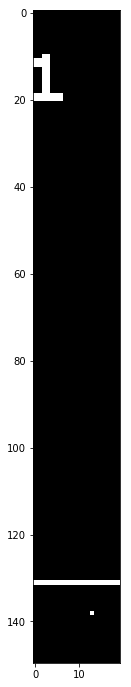

In [28]:
find_bird(bird_img[:,-20:])